In [2]:
import h5py
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
file = '/Users/ahyeon/Desktop/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [4]:
f = h5py.File(file, 'r')
print(list(f.keys()))

['cluster_sizes', 'clusters', 'norm_score', 'score', 'seed', 'umap_dimensions', 'umap_embeddings', 'umap_embeddings_dimscale', 'umap_min_dist', 'umap_n_neighbors']


In [5]:
umap_dims = f['umap_dimensions'][:]
umap_dims.shape

(9,)

In [40]:
f['umap_embeddings_dimscale'][:]

array([ 2,  2,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [7]:
f['umap_embeddings'].shape

(50, 247, 54)

In [42]:
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]
emb.shape

(50, 247, 54)

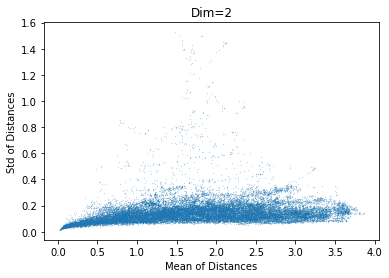

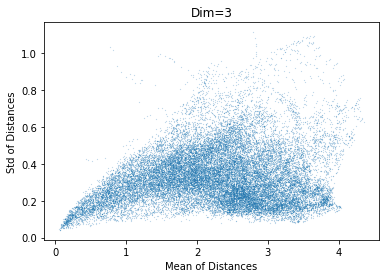

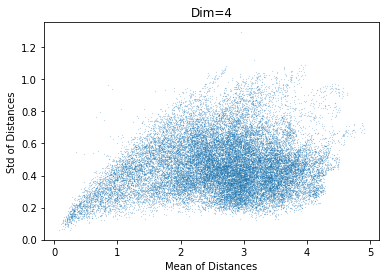

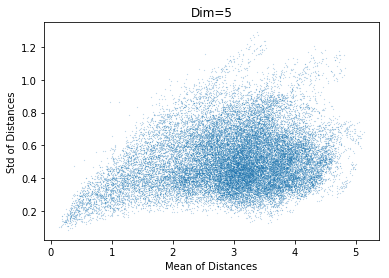

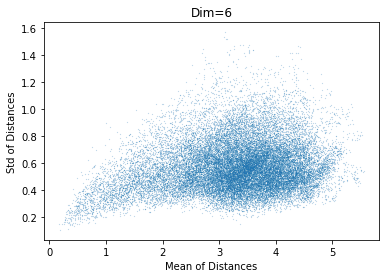

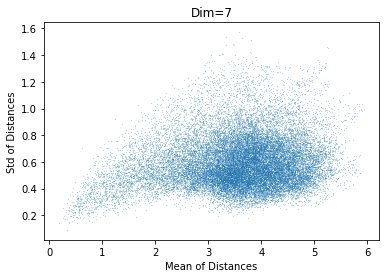

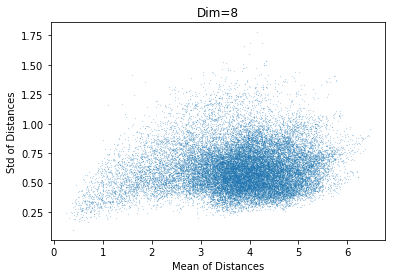

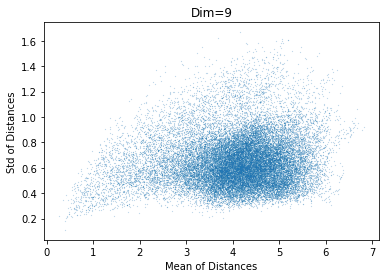

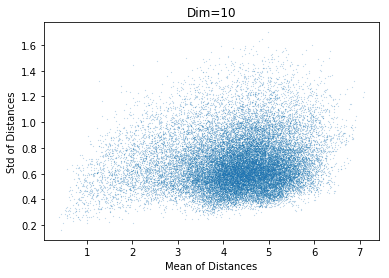

In [149]:
pp = PdfPages('/Users/ahyeon/Desktop/mahalanobis.pdf')

for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)
    std = np.std(all_dmat, axis=1)
    fig = plt.figure()
    plt.plot(mean, std, '.', markersize='0.2', rasterized=True)
    plt.xlabel('Mean of Distances')
    plt.ylabel('Std of Distances')
    plt.title('Dim={}'.format(dim))
    pp.savefig(fig)
pp.close()


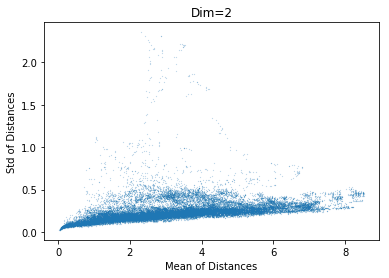

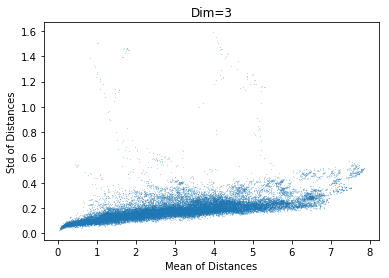

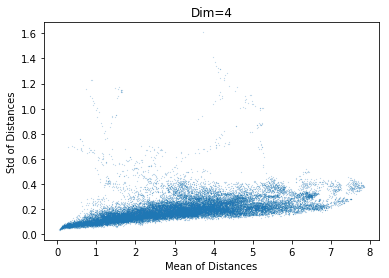

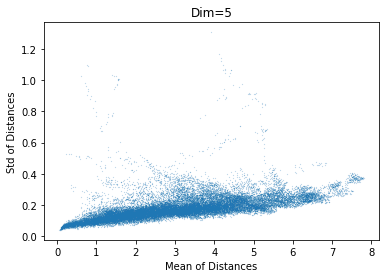

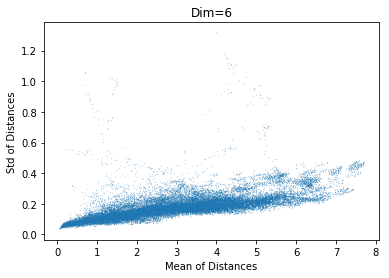

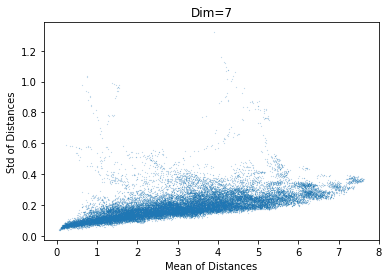

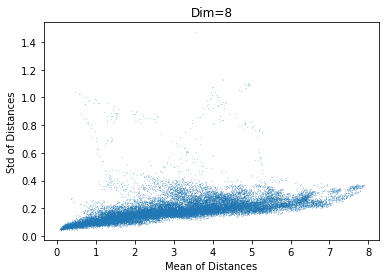

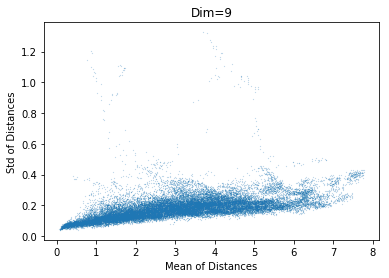

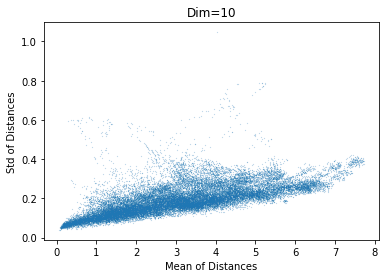

In [150]:
pp = PdfPages('/Users/ahyeon/Desktop/euclidean.pdf')
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='euclidean')
        all_dmat[:,x] = dmat

    mean = all_dmat.mean(axis=1)
    std = np.std(all_dmat, axis=1)
    fig = plt.figure()
    plt.plot(mean, std, '.', markersize='0.2', rasterized=True)
    plt.xlabel('Mean of Distances')
    plt.ylabel('Std of Distances')
    plt.title('Dim={}'.format(dim))
    pp.savefig(fig)
pp.close()
    

(array([  7.25000000e+03,   1.51690000e+04,   6.74500000e+03,
          1.01800000e+03,   9.50000000e+01,   6.40000000e+01,
          2.60000000e+01,   1.30000000e+01,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.03946245,  0.14021861,  0.24097476,  0.34173091,  0.44248706,
         0.54324321,  0.64399936,  0.74475552,  0.84551167,  0.94626782,
         1.04702397]),
 <a list of 10 Patch objects>)

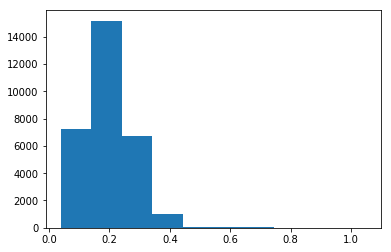

In [99]:
plt.hist(std)

In [118]:
all_dmat.shape

(30381, 50)

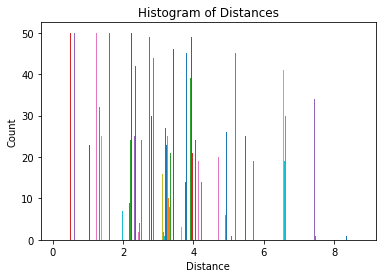

In [148]:
T = all_dmat.T
# plt.hist(T)
plt.hist(T[:,1:2000])
plt.title('Histogram of Distances')
plt.xlabel('Distance')
plt.ylabel('Count')
all_dmat.shape
plt.savefig('/Users/ahyeon/Desktop/histogram.pdf')

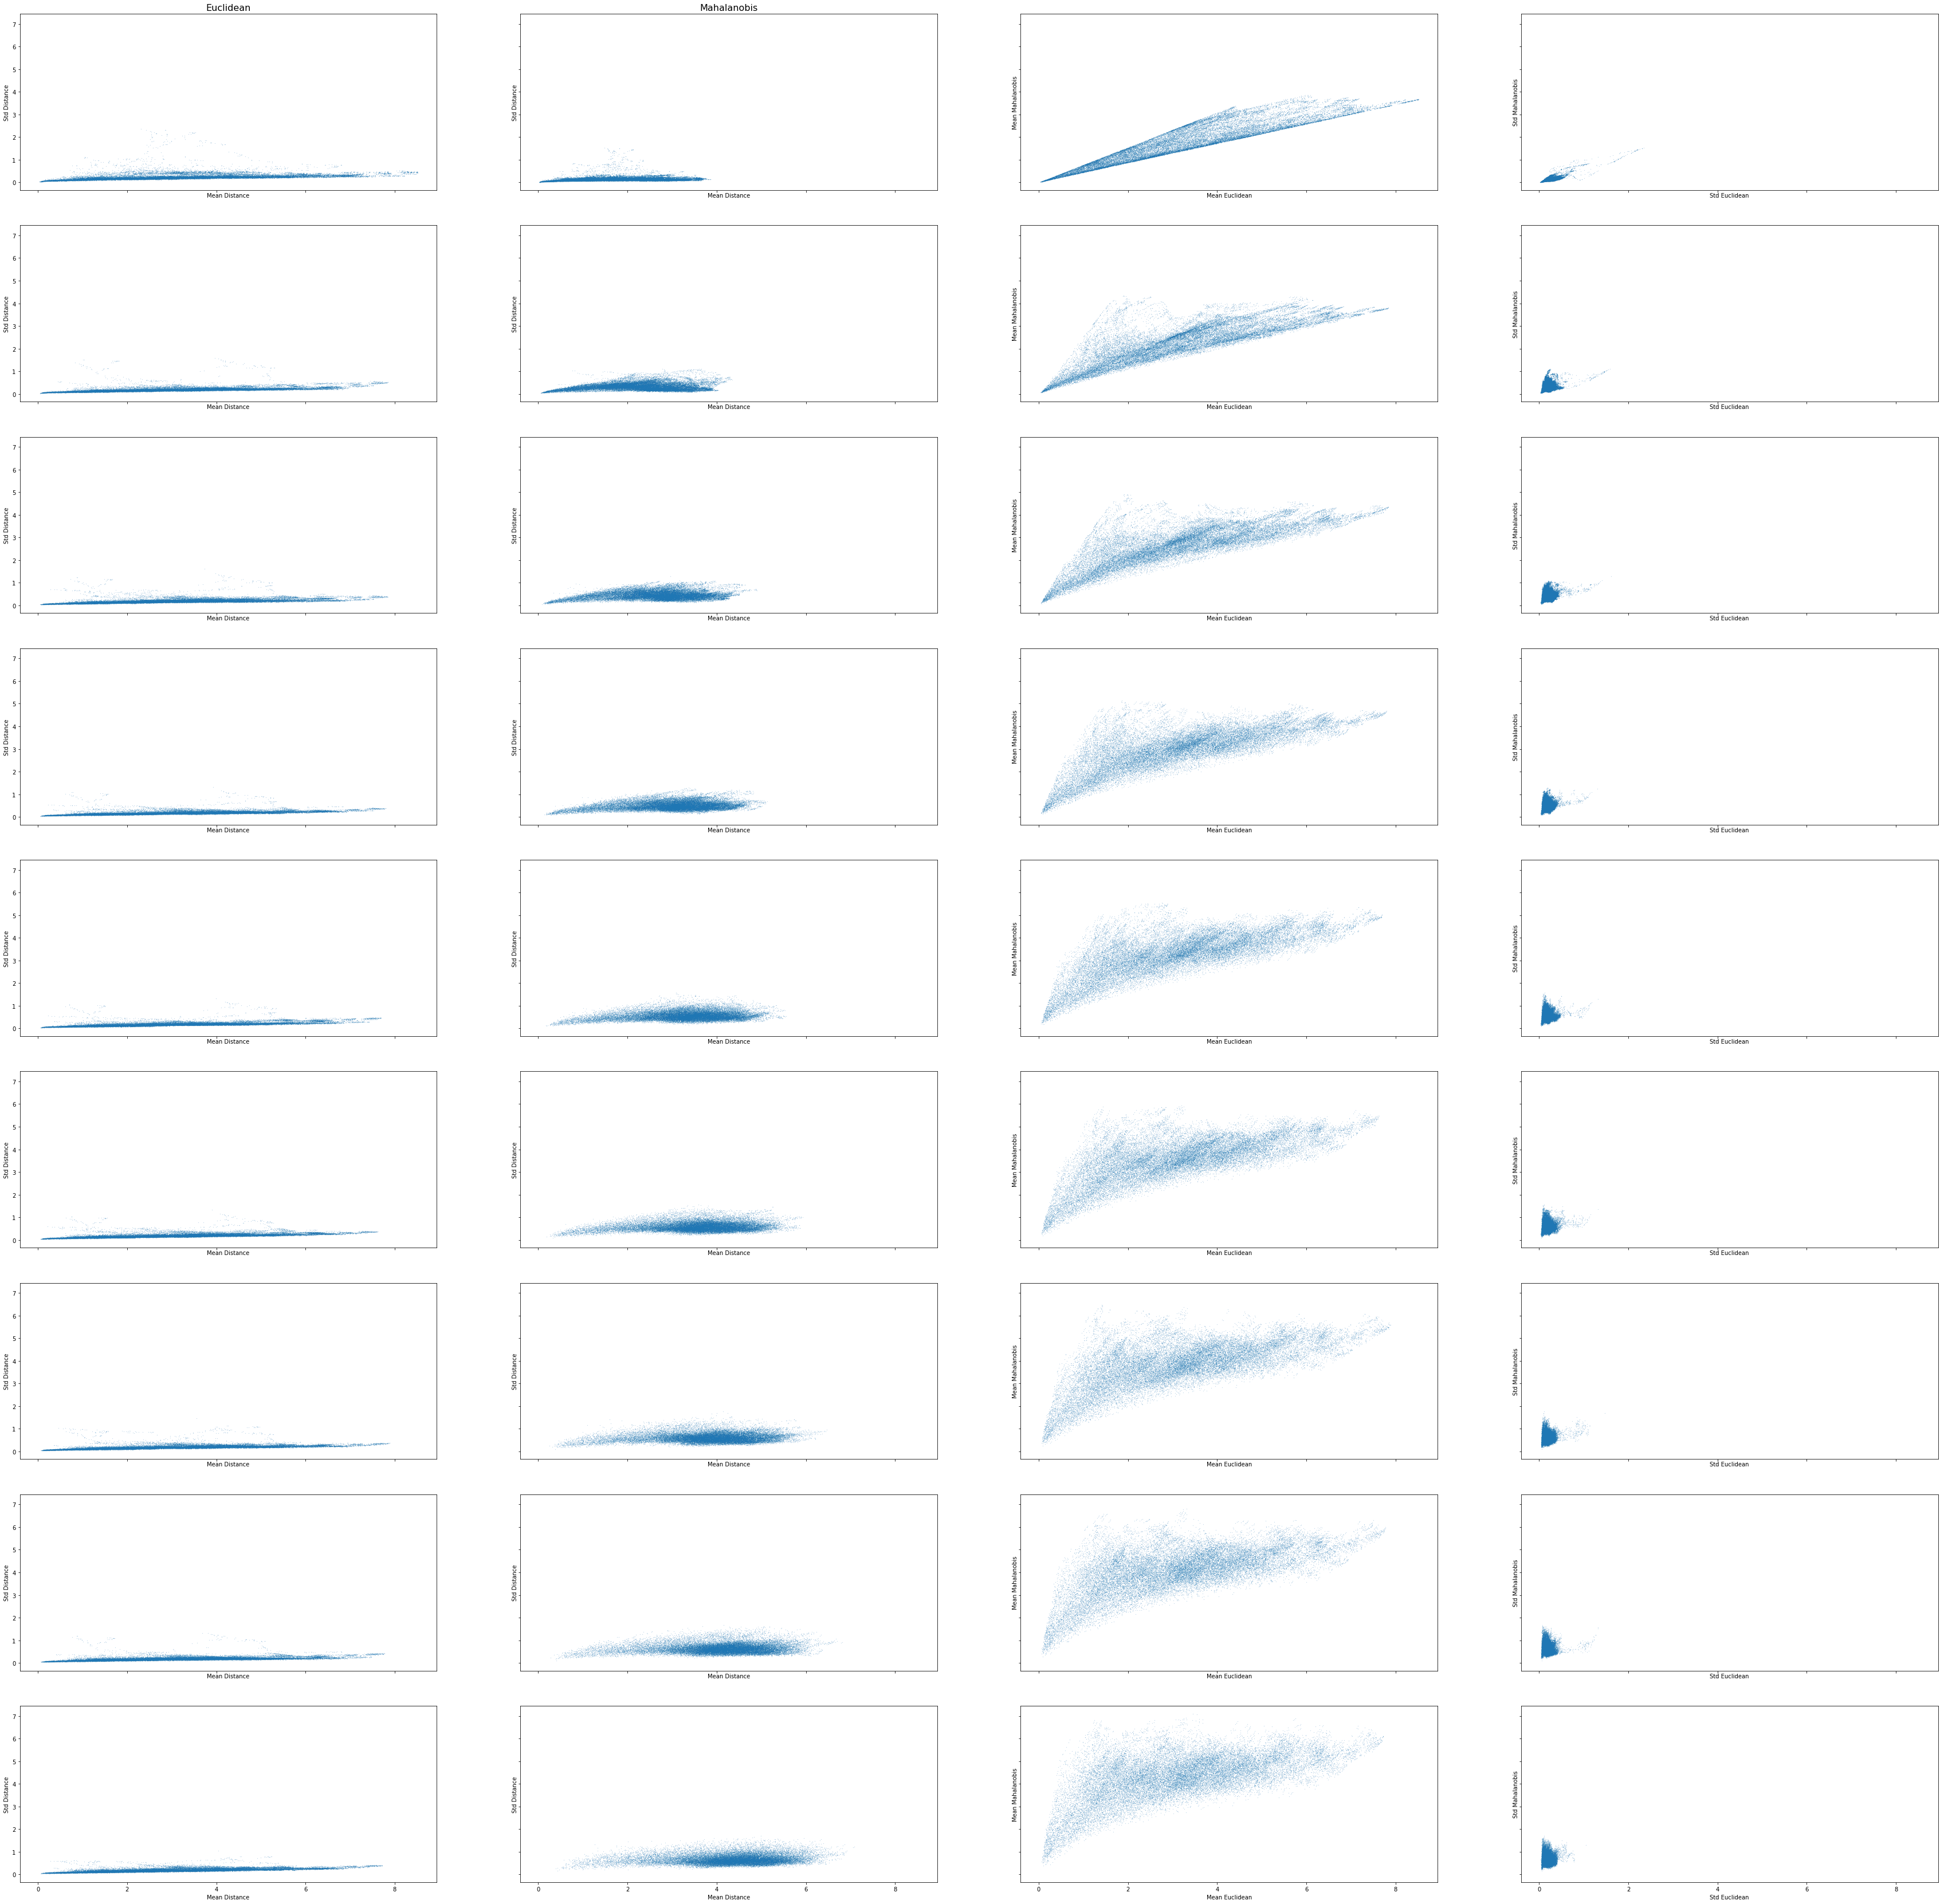

In [182]:
# euclidean vs mahalanobis
pp = PdfPages('/Users/ahyeon/Desktop/umap_stability_allgraphs.pdf')

fig, axes = plt.subplots(nrows=9, ncols=4, sharex=True, sharey=True, figsize=(60,60))

for dim in umap_dims:
    all_euc_mat = np.zeros((30381,50))
    all_mah_mat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        euc_mat = pdist(emb[x][:,scale==dim], metric='euclidean')
        mah_mat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_euc_mat[:,x] = euc_mat
        all_mah_mat[:,x] = mah_mat
    euc_mean = all_euc_mat.mean(axis=1)
    euc_std = np.std(all_euc_mat, axis=1)
    mah_mean = all_mah_mat.mean(axis=1)
    mah_std = np.std(all_mah_mat, axis=1)
    
    axes[dim-2,0].plot(euc_mean, euc_std, '.', markersize='0.2', rasterized=True)
    axes[dim-2,0].set_xlabel('Mean Distance')
    axes[dim-2,0].set_ylabel('Std Distance')
    axes[0,0].set_title('Euclidean', fontsize=16)
    
    axes[dim-2,1].plot(mah_mean, mah_std, '.', markersize='0.2', rasterized=True)
    axes[dim-2,1].set_xlabel('Mean Distance')
    axes[dim-2,1].set_ylabel('Std Distance')
    axes[0,1].set_title('Mahalanobis', fontsize=16)
    
    axes[dim-2,2].plot(euc_mean, mah_mean, '.', markersize='0.2', rasterized=True)
    axes[dim-2,2].set_xlabel('Mean Euclidean')
    axes[dim-2,2].set_ylabel('Mean Mahalanobis')
    
    axes[dim-2,3].plot(euc_std, mah_std, '.', markersize='0.2', rasterized=True)
    axes[dim-2,3].set_xlabel('Std Euclidean')
    axes[dim-2,3].set_ylabel('Std Mahalanobis')

pp.savefig(fig, dpi=300)  
pp.close()
    

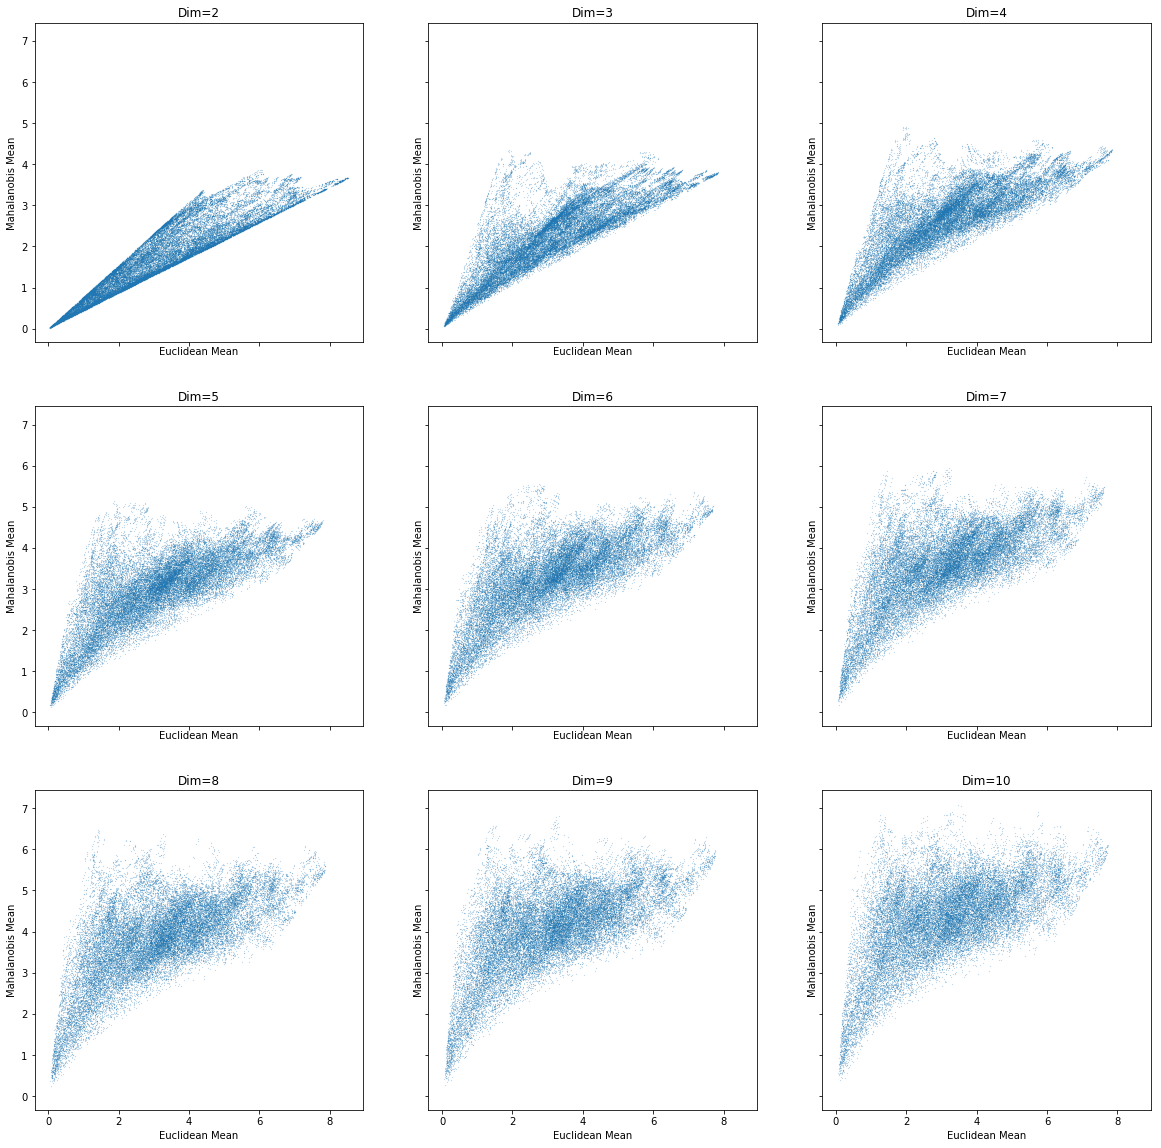

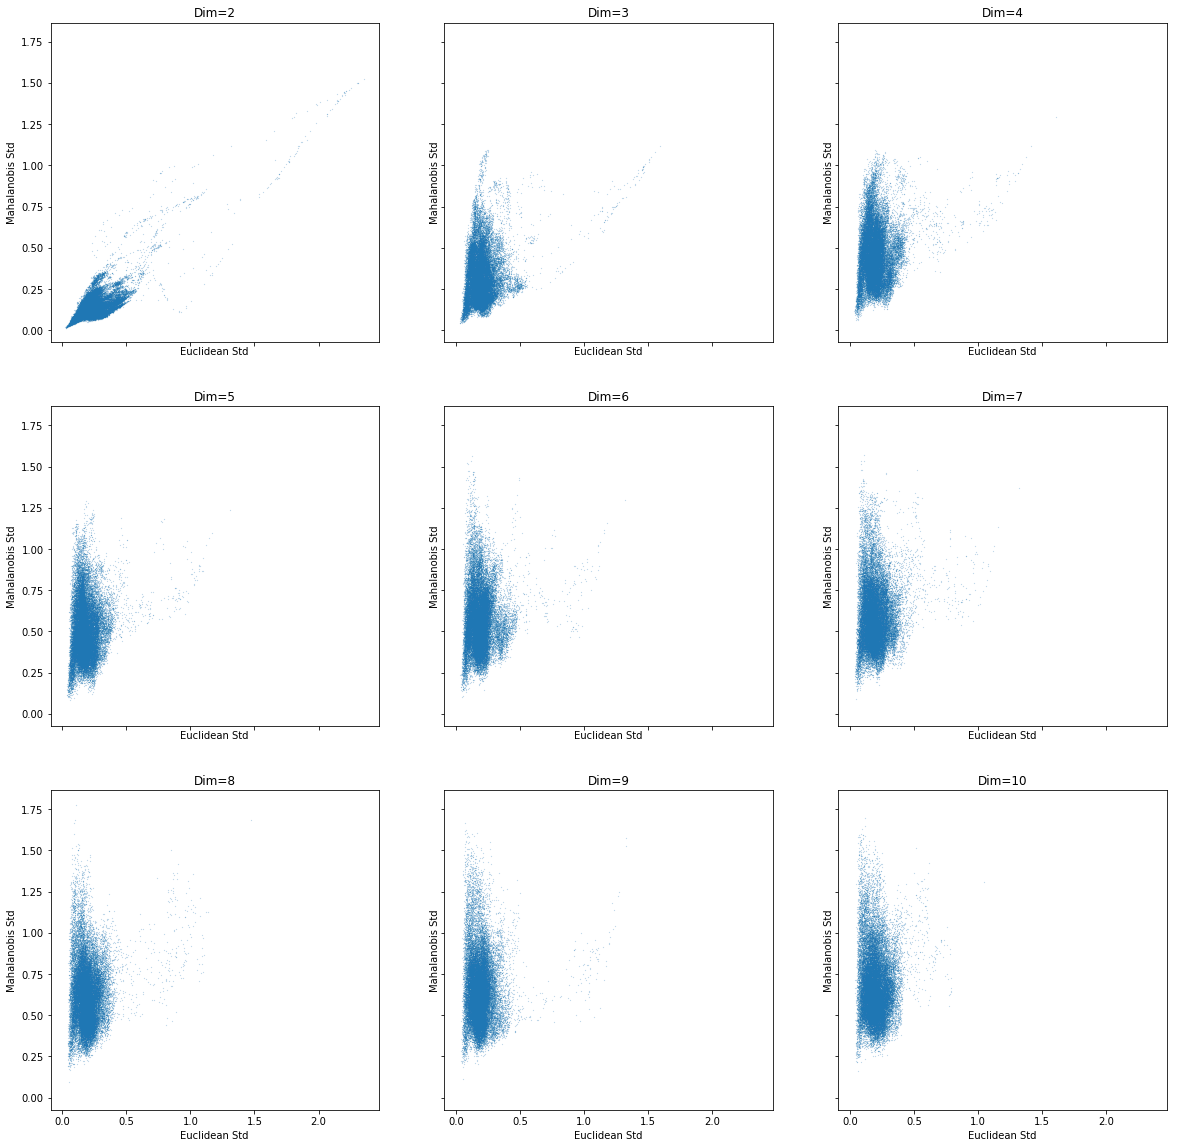

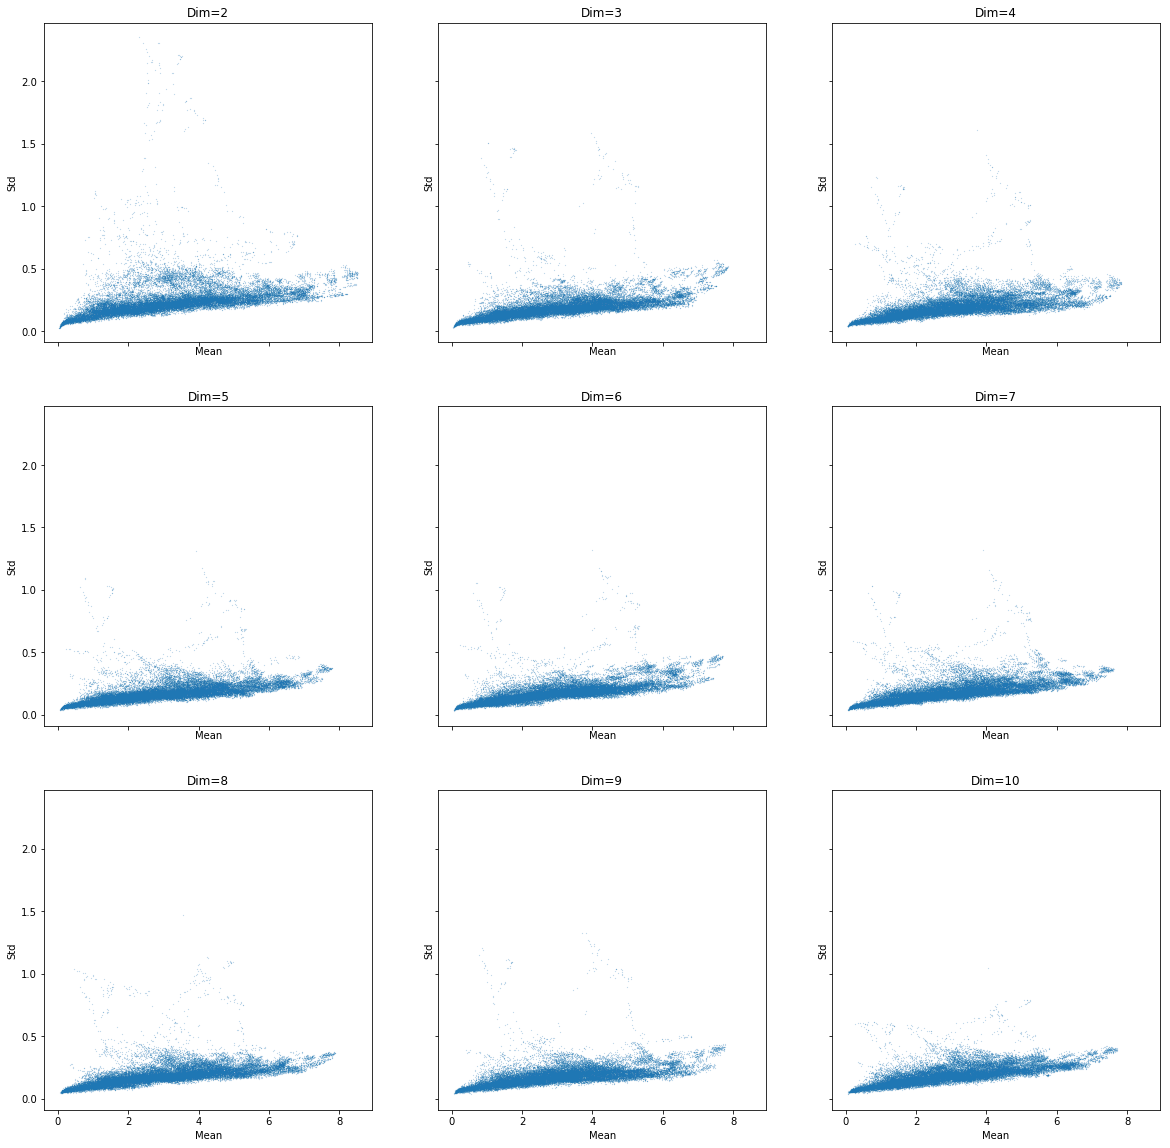

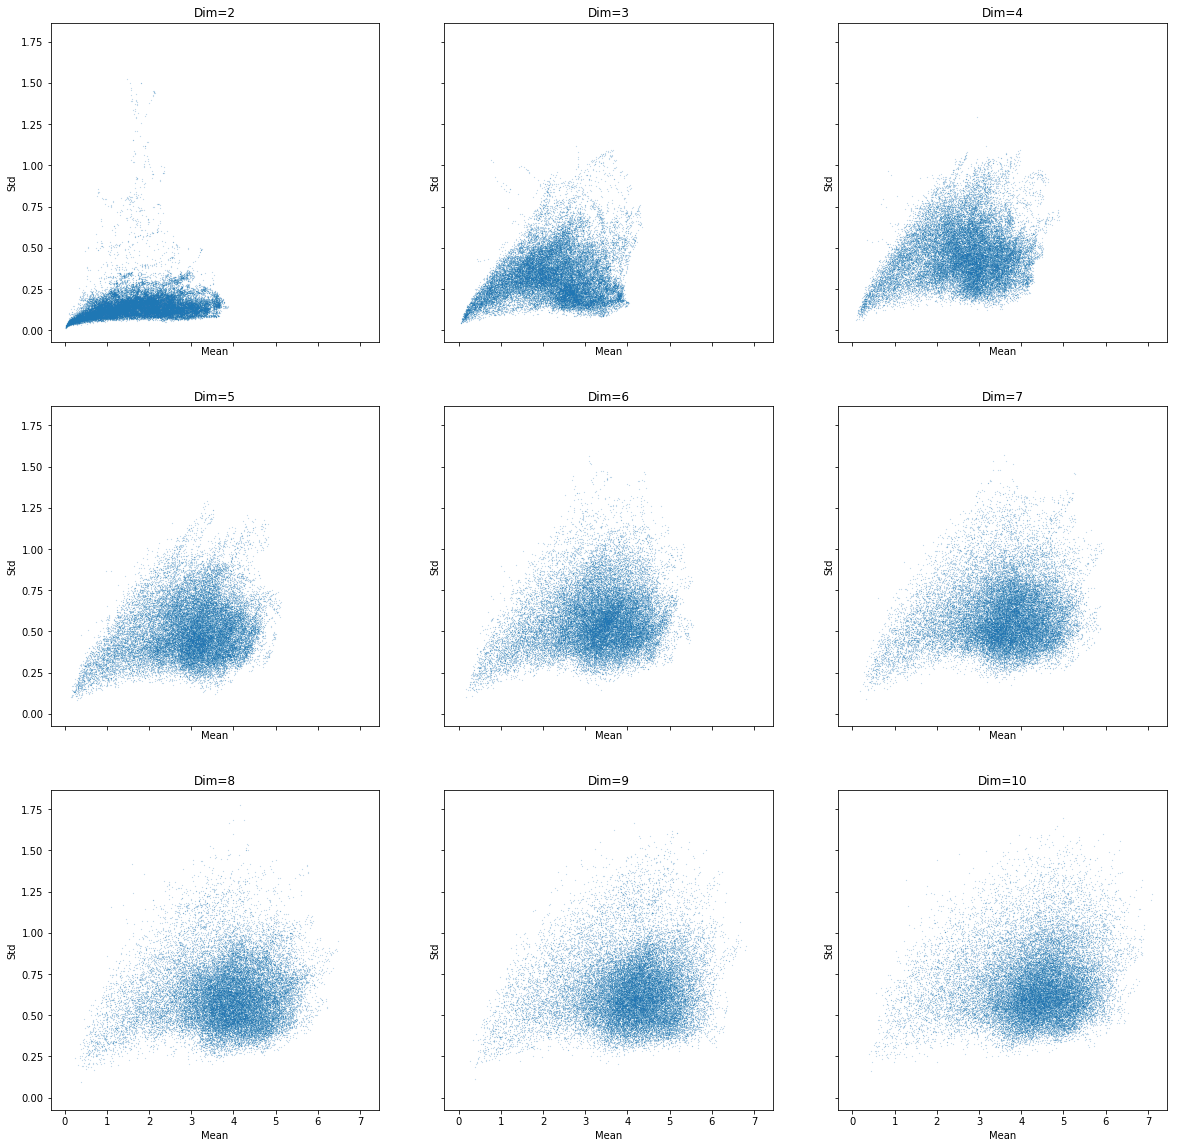

In [183]:
p1 = PdfPages('/Users/ahyeon/Desktop/emean_mmean.pdf')
p2 = PdfPages('/Users/ahyeon/Desktop/estd_mstd.pdf')
p3 = PdfPages('/Users/ahyeon/Desktop/euclidean_mean_vs_std.pdf')
p4 = PdfPages('/Users/ahyeon/Desktop/mahalanobis_mean_vs_std.pdf')

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,20))
fig2, axes2 = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,20))
fig3, axes3 = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,20))
fig4, axes4 = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(20,20))

axes = axes.flatten()
axes2 = axes2.flatten()
axes3 = axes3.flatten()
axes4 = axes4.flatten()

for dim in umap_dims:
    all_euc_mat = np.zeros((30381,50))
    all_mah_mat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        euc_mat = pdist(emb[x][:,scale==dim], metric='euclidean')
        mah_mat = pdist(emb[x][:,scale==dim], metric='mahalanobis')
        all_euc_mat[:,x] = euc_mat
        all_mah_mat[:,x] = mah_mat
    euc_mean = all_euc_mat.mean(axis=1)
    euc_std = np.std(all_euc_mat, axis=1)
    mah_mean = all_mah_mat.mean(axis=1)
    mah_std = np.std(all_mah_mat, axis=1)
    
    #p1
    plt.title('Euclidean Mean vs Mahalanobis mean')
    axes[dim-2].plot(euc_mean, mah_mean, '.', markersize='0.2', rasterized=True)
    axes[dim-2].set_xlabel('Euclidean Mean')
    axes[dim-2].set_ylabel('Mahalanobis Mean')
    axes[dim-2].set_title('Dim={}'.format(dim))
    
    #p2
    plt.title('Euclidean Std vs Mahalanobis Std')
    axes2[dim-2].plot(euc_std, mah_std, '.', markersize='0.2', rasterized=True)
    axes2[dim-2].set_xlabel('Euclidean Std')
    axes2[dim-2].set_ylabel('Mahalanobis Std')
    axes2[dim-2].set_title('Dim={}'.format(dim))
    
    # p3
    axes3[dim-2].plot(euc_mean, euc_std, '.', markersize='0.2', rasterized=True)
    axes3[dim-2].set_xlabel('Mean')
    axes3[dim-2].set_ylabel('Std')
    axes3[dim-2].set_title('Dim={}'.format(dim))
    
    # p4
    axes4[dim-2].plot(mah_mean, mah_std, '.', markersize='0.2', rasterized=True)
    axes4[dim-2].set_xlabel('Mean')
    axes4[dim-2].set_ylabel('Std')
    axes4[dim-2].set_title('Dim={}'.format(dim))
    
p1.savefig(fig, dpi=300)
p2.savefig(fig2, dpi=300)
p3.savefig(fig3, dpi=300)
p4.savefig(fig4, dpi=300)
p1.close()
p2.close()
p3.close()
p4.close()

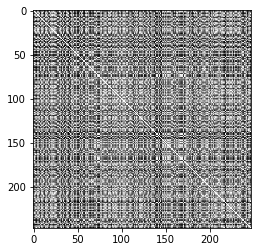

In [57]:
mat = squareform(pdist(emb[0][:,scale==2], metric="mahalanobis"))
plt.imshow(mat, cmap='binary')

In [ ]:
spearman correlation rank 